In [1]:
%matplotlib inline

# imports
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# create handle to BeautifulSoup instance
soup = BeautifulSoup(open("./data/gu-home.html"), "html.parser")

# save all anchors from the page
all_anchors = soup.find_all('a')
all_anchors[:10]

[<a class="element-invisible element-focusable" href="#main-content">Skip to main content</a>,
 <a href="/">
 <img alt="Georgetown" src="/sites/all/themes/at_georgetown/images/np-georgetown.png"/>
 <img alt="University" src="/sites/all/themes/at_georgetown/images/np-university.png"/>
 </a>,
 <a href="#gu-search" id="button-search"><img alt="Search" src="/sites/all/themes/at_gu_toptier/images/icon-search.png"/></a>,
 <a href="#menu-full" id="button-menu"><img alt="Menu" src="/sites/all/themes/at_gu_toptier/images/icon-menu.png"/></a>,
 <a href="http://giving.georgetown.edu/">Giving</a>,
 <a href="/connect-with-us">Connect</a>,
 <a href="http://contact.georgetown.edu/">Directory</a>,
 <a href="/admissions">Admissions</a>,
 <a href="/academics">Academics</a>,
 <a href="/campus-life">Campus Life</a>]

In [2]:
# of the first 20 links, print all the ones with text (not linked images)
for anchor in all_anchors[:20]:
    if anchor.text.strip():
        print(anchor.text.strip() + '\n' + anchor['href'] + '\n')

Skip to main content
#main-content

Giving
http://giving.georgetown.edu/

Connect
/connect-with-us

Directory
http://contact.georgetown.edu/

Admissions
/admissions

Academics
/academics

Campus Life
/campus-life

Research
/research

Alumni
/alumni

About
/about

Featured News
/news

Juvenile Justice Clinic Creates Opportunity for Law Students While Serving the Community
http://video.law.georgetown.edu/category/videos/home/video/4389694721001/juvenile-justice-clinic#id/4389694721001

Study: Monarch Butterflies May Not Be Declining in U.S., Canada
http://college.georgetown.edu/collegenews/whats-really-happening-to-the-monarchs

$50M Gift to Georgetown Funds Athletics Leadership Program, Facilities
/athletics-leadership-cooper-gift



In [3]:
# create an array of tuples containing the text and href
links = [(a.text, a['href']) for a in all_anchors]
links[:20]

[('Skip to main content', '#main-content'),
 ('\n\n\n', '/'),
 ('', '#gu-search'),
 ('', '#menu-full'),
 ('Giving', 'http://giving.georgetown.edu/'),
 ('Connect', '/connect-with-us'),
 ('Directory', 'http://contact.georgetown.edu/'),
 ('Admissions', '/admissions'),
 ('Academics', '/academics'),
 ('Campus Life', '/campus-life'),
 ('Research', '/research'),
 ('Alumni', '/alumni'),
 ('About', '/about'),
 ('Featured News', '/news'),
 ('',
  'http://video.law.georgetown.edu/category/videos/home/video/4389694721001/juvenile-justice-clinic#id/4389694721001'),
 ('Juvenile Justice Clinic Creates Opportunity for Law Students While Serving the Community',
  'http://video.law.georgetown.edu/category/videos/home/video/4389694721001/juvenile-justice-clinic#id/4389694721001'),
 ('',
  'http://college.georgetown.edu/collegenews/whats-really-happening-to-the-monarchs'),
 ('Study: Monarch Butterflies May Not Be Declining in U.S., Canada ',
  'http://college.georgetown.edu/collegenews/whats-really-happen

In [4]:
# use urlparse to get the FQDNs (site addresses)
from urllib.parse import urlparse

links = [(a.text, a['href'], urlparse(a['href']).netloc) for a in all_anchors]

# display example tuple
links[4:5] 

[('Giving', 'http://giving.georgetown.edu/', 'giving.georgetown.edu')]

In [5]:
# create a pandas DataFrame using this array of anchor data
import pandas as pd
pd.set_option('display.max_rows', 100) 

df = pd.DataFrame(links, columns=['title','href','site'])
df

,title,href,site
0,Skip to main content,#main-content,
1,\n\n\n,/,
2,,#gu-search,
3,,#menu-full,
4,Giving,http://giving.georgetown.edu/,giving.georgetown.edu
5,Connect,/connect-with-us,
6,Directory,http://contact.georgetown.edu/,contact.georgetown.edu
7,Admissions,/admissions,
8,Academics,/academics,
9,Campus Life,/campus-life,


In [6]:
# view quick statistics
df.describe()

,title,href,site
count,338,338,338
unique,246,236,63
top,,/nso-welcome-2015,
freq,56,4,190


In [7]:
# only rows that have site values
df = df[df['site'] != '']
df.head(10)

,title,href,site
4,Giving,http://giving.georgetown.edu/,giving.georgetown.edu
6,Directory,http://contact.georgetown.edu/,contact.georgetown.edu
14,,http://video.law.georgetown.edu/category/video...,video.law.georgetown.edu
15,Juvenile Justice Clinic Creates Opportunity fo...,http://video.law.georgetown.edu/category/video...,video.law.georgetown.edu
16,,http://college.georgetown.edu/collegenews/what...,college.georgetown.edu
17,Study: Monarch Butterflies May Not Be Declinin...,http://college.georgetown.edu/collegenews/what...,college.georgetown.edu
20,,http://college.georgetown.edu/collegenews/cont...,college.georgetown.edu
21,Senior Finds Path to Excellence Through Art an...,http://college.georgetown.edu/collegenews/cont...,college.georgetown.edu
22,,https://gumc.georgetown.edu/news/Neuroscientis...,gumc.georgetown.edu
23,Neuroscientists Find Brain Malady Responsible ...,https://gumc.georgetown.edu/news/Neuroscientis...,gumc.georgetown.edu


In [8]:
# create a frequency count of the sites
dist = df['site'].value_counts()
dist.head(10)

gumc.georgetown.edu           14
college.georgetown.edu        14
alumni.georgetown.edu          9
scs.georgetown.edu             6
www.georgetown.edu             6
maps.georgetown.edu            5
uadmissions.georgetown.edu     4
guevents.georgetown.edu        4
finaid.georgetown.edu          4
www.law.georgetown.edu         4
Name: site, dtype: int64

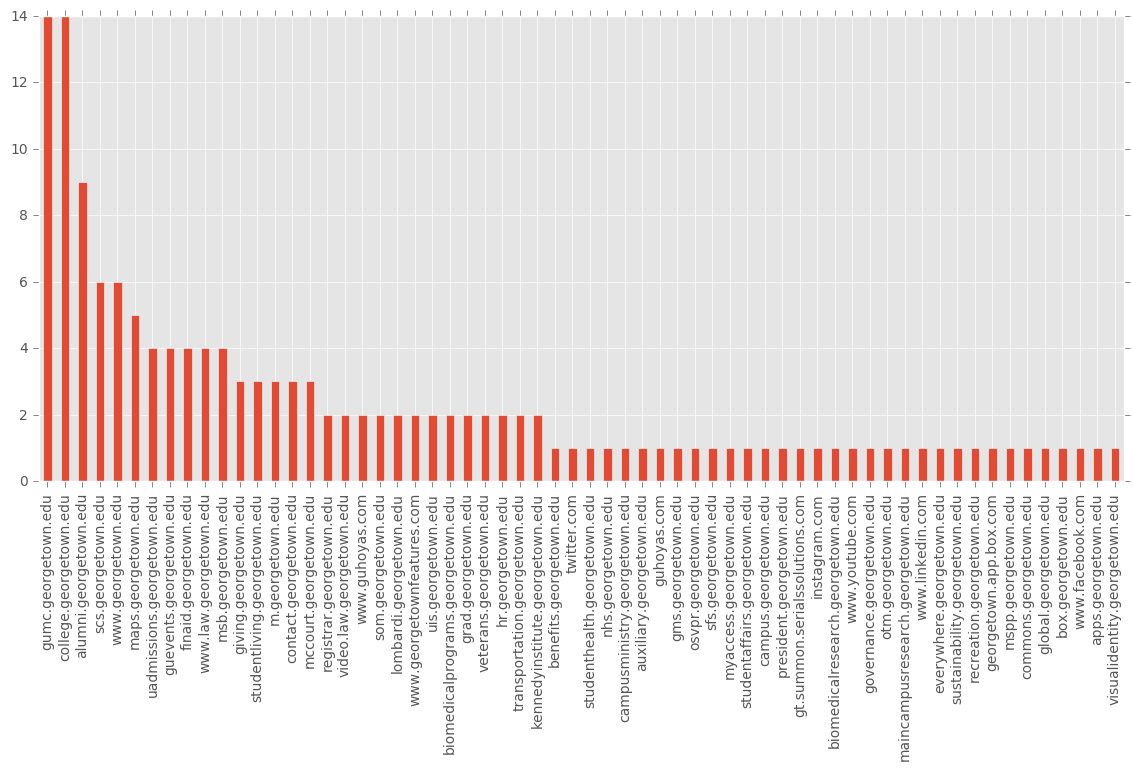

In [9]:
# set style options (optional step)
plt.style.use('ggplot')

# create a bar graph to depict the frequencies
dist.plot(kind='bar', figsize=(14,6));

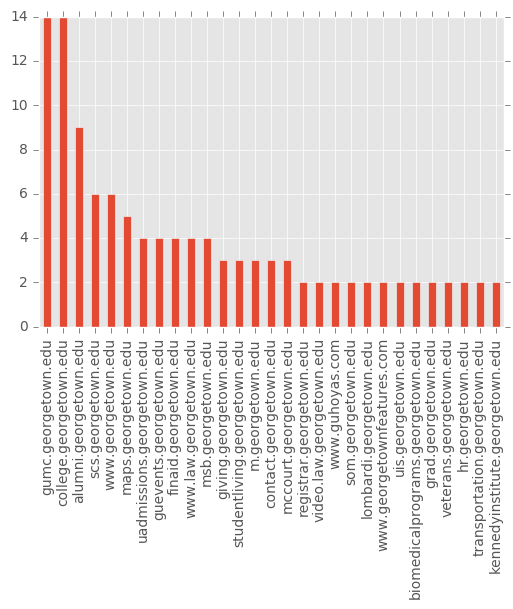

In [10]:
# plot only those that are seen more than once
dist[dist > 1].plot(kind='bar')